In [1]:
from math import *
import numpy as np
import matplotlib.pylab as plt
from scipy.optimize import curve_fit

In [2]:
voltage,counts,counts_uncertainty = np.loadtxt('idealv.csv', skiprows=2, dtype=float, delimiter=',', unpack=True, usecols=(range(0,3)))

In [3]:
def model1(x,a,b):
    return x*a+b

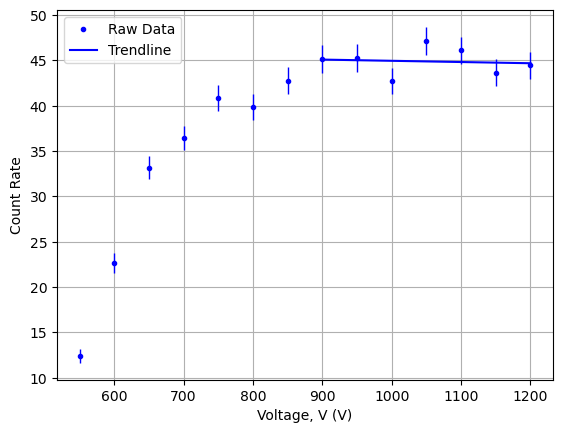

In [4]:
plateau_start = 900
plateau_end = 1200
plateau_indices = (voltage >= plateau_start) & (voltage <= plateau_end)
counts_plateau = counts[plateau_indices]
voltage_plateau = voltage[plateau_indices]
counts_uncertainty_plateau = counts_uncertainty[plateau_indices]
popt1,pcov1=curve_fit(model1,voltage_plateau,counts_plateau,sigma=counts_uncertainty_plateau,absolute_sigma=True)
plt.plot(voltage,counts,marker='.',linewidth=0,color='b',label='Raw Data')
plt.plot(voltage_plateau,model1(voltage_plateau,popt1[0],popt1[1]),color='b',label='Trendline')
plt.errorbar(voltage,counts,yerr=counts_uncertainty,marker='o',ls='',lw=1,color='b',ms=1)
plt.xlabel('Voltage, V (V)')
plt.ylabel('Count Rate')
plt.grid()
plt.legend()
plt.show()